# **Brain and Cognitive Society, IIT Kanpur**
## **Introduction to Deep Learning Workshop**
**This python notebook is an assingment on ML/DL**

In this assingment you will solve a **regression** problem of predicting House prices using basic python libraries, and build a **neural network** for handwritten digit identification using **TensorFlow**

## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-26 02:09:57--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.69.113, 74.125.69.102, 74.125.69.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.69.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-26 02:09:57--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.214.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --.-

In [ ]:
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.strip('T000000')                                         # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_array = (data_df.drop(columns=['id'])).to_numpy(dtype='int')                                              # Create a numpy array which does not have "id" field                                              # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

print(data_array)

data_df.head()

[[20141013   221900        3 ...     -122     1340     5650]
 [20141209   538000        3 ...     -122     1690     7639]
 [20150225   180000        2 ...     -122     2720     8062]
 ...
 [20140623   402101        2 ...     -122     1020     2007]
 [20150116   400000        3 ...     -122     1410     1287]
 [20141015   325000        2 ...     -122     1020     1357]]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:

mean_array = np.mean(data_array,0)                                        # this should be an array, each entry should be mean of a column
sd_array = np.mean(data_array,0)                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean_array)/sd_array
print(data_array_norm)

print(data_array_norm.shape)

[[-1.43451262e-04 -5.89141137e-01 -1.10014550e-01 ...  5.59706236e-04
  -3.25464590e-01 -5.57503260e-01]
 [-1.33721270e-04 -3.86629812e-03 -1.10014550e-01 ...  5.59706236e-04
  -1.49279968e-01 -4.01728744e-01]
 [ 3.13858335e-04 -6.66721066e-01 -4.06676366e-01 ...  5.59706236e-04
   3.69206206e-01 -3.68600227e-01]
 ...
 [-1.62811959e-04 -2.55490042e-01 -4.06676366e-01 ...  5.59706236e-04
  -4.86547673e-01 -8.42815760e-01]
 [ 3.08447268e-04 -2.59380147e-01 -1.10014550e-01 ...  5.59706236e-04
  -2.90227665e-01 -8.99204725e-01]
 [-1.43351976e-04 -3.98246370e-01 -4.06676366e-01 ...  5.59706236e-04
  -4.86547673e-01 -8.93722464e-01]]
(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_array_norm[:,1]                                                                                                            # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = ((y_pred-y_true)**2).mean()                      # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  y_true = y_true.astype(float)
  d=[1]*n
  for k in range(0,n,1):
    d[k] = 2*np.mean(x[:,k]*np.subtract(yp,y_true))
  da = np.array(d)              # write code to calculate derivative of loss with respect to a
  db = 2*np.mean(np.subtract(yp,y_true))             # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 100):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []
  v = [0]*n                                 # initialize empty list to store loss
  a = np.array(v)
  n, = a.shape                              # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    for j in range(0,n,1):
      a[j] = a[j] - learning_rate*gradient(x,a,b,y_true)[0][j]
    b = b - learning_rate*gradient(x,a,b,y_true)[1]

    l_mse = loss(y(x,a,b),y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 100              # tweak this!!!
learn_rate = 0.01          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  0.45118433923506135
Epoch  2  Completed! loss =  0.45118390541102477
Epoch  3  Completed! loss =  0.45118348876642
Epoch  4  Completed! loss =  0.4511830886209416
Epoch  5  Completed! loss =  0.4511827043212241
Epoch  6  Completed! loss =  0.45118233523977547
Epoch  7  Completed! loss =  0.45118198077395216
Epoch  8  Completed! loss =  0.4511816403449755
Epoch  9  Completed! loss =  0.4511813133969863
Epoch  10  Completed! loss =  0.45118099939613754
Epoch  11  Completed! loss =  0.4511806978297223
Epoch  12  Completed! loss =  0.4511804082053371
Epoch  13  Completed! loss =  0.4511801300500775
Epoch  14  Completed! loss =  0.4511798629097663
Epoch  15  Completed! loss =  0.45117960634821136
Epoch  16  Completed! loss =  0.451179359946494
Epoch  17  Completed! loss =  0.45117912330228466
Epoch  18  Completed! loss =  0.45117889602918604
Epoch  19  Completed! loss =  0.4511786777561021
Epoch  20  Completed! loss =  0.45117846812663226
Epoch  21  Completed! l

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Epoch  1  Completed! loss =  0.5235667499835867
Epoch  2  Completed! loss =  0.5235528199172582
Epoch  3  Completed! loss =  0.5235394414815564
Epoch  4  Completed! loss =  0.5235265928319085
Epoch  5  Completed! loss =  0.5235142529887866
Epoch  6  Completed! loss =  0.5235024018034523
Epoch  7  Completed! loss =  0.5234910199250573
Epoch  8  Completed! loss =  0.5234800887690468
Epoch  9  Completed! loss =  0.5234695904868142
Epoch  10  Completed! loss =  0.5234595079365579
Epoch  11  Completed! loss =  0.523449824655292
Epoch  12  Completed! loss =  0.523440524831964
Epoch  13  Completed! loss =  0.52343159328164
Epoch  14  Completed! loss =  0.5234230154207088
Epoch  15  Completed! loss =  0.5234147772430704
Epoch  16  Completed! loss =  0.5234068652972664
Epoch  17  Completed! loss =  0.5233992666645164
Epoch  18  Completed! loss =  0.5233919689376232
Epoch  19  Completed! loss =  0.523384960200715
Epoch  20  Completed! loss =  0.5233782290097884
Epoch  21  Completed! loss =  0.52

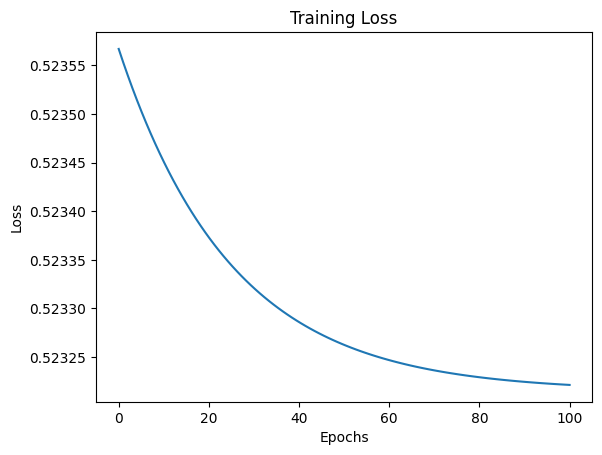

In [ ]:
test_loss = gradient_descent(x_test,y_test,learn_rate,epochs)
print("Loss on test data = ",test_loss)
epo=np.linspace(0,epochs,epochs)

plt.plot(epo,test_loss[0])                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       5       0       8       8       

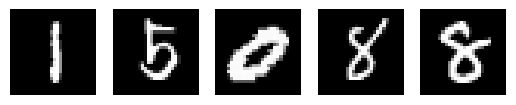

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()


#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(-1,784)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(-1,784)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]#indexes 0 to 10000
y_validation = y_train[:n_validation]#indexes 0 to 10000

x_train_flatten = x_train_flatten[n_validation:]#indexes 10000 to rest
y_train = y_train[n_validation:]#indexes 10000 to rest
#print(x_train_flatten.shape)

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(512,activation='sigmoid'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(64,activation='sigmoid'),

])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7eac466bd7b0>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 100              # set number of epochs
batch_size = 1024            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 6s 116ms/step - loss: 1.9553 - accuracy: 0.5707 - val_loss: 0.7733 - val_accuracy: 0.8742
Epoch 2/100
40/40 [==============================] - 3s 67ms/step - loss: 0.5619 - accuracy: 0.8863 - val_loss: 0.3739 - val_accuracy: 0.9145
Epoch 3/100
40/40 [==============================] - 3s 73ms/step - loss: 0.3513 - accuracy: 0.9158 - val_loss: 0.2850 - val_accuracy: 0.9301
Epoch 4/100
40/40 [==============================] - 3s 81ms/step - loss: 0.2756 - accuracy: 0.9297 - val_loss: 0.2393 - val_accuracy: 0.9381
Epoch 5/100
40/40 [==============================] - 4s 98ms/step - loss: 0.2280 - accuracy: 0.9414 - val_loss: 0.2031 - val_accuracy: 0.9470
Epoch 6/100
40/40 [==============================] - 3s 76ms/step - loss: 0.2020 - accuracy: 0.9461 - val_loss: 0.2013 - val_accuracy: 0.9455
Epoch 7/100
40/40 [==============================] - 3s 69ms/step - loss: 0.1846 - accuracy: 0.9497 - val_loss: 0.1808 - val_accuracy: 0.9503
Epoch

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 2s 6ms/step - loss: 0.1065 - accuracy: 0.9696
Loss =  0.10647638887166977
Accuracy =  96.96000218391418 %


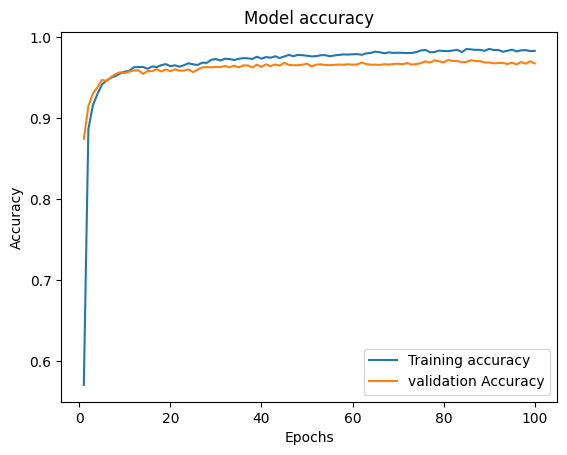

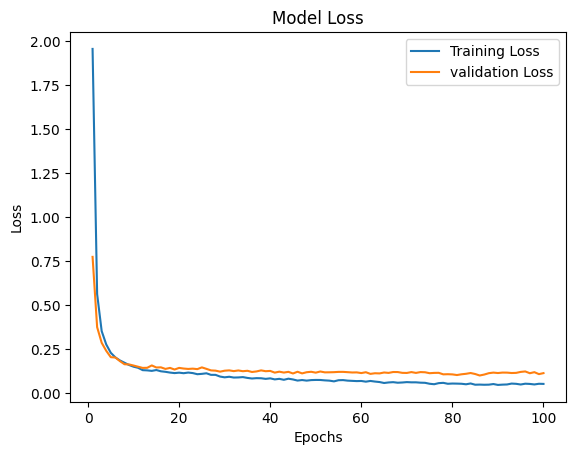

In [ ]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(range(1,n_epochs+1),history.history['accuracy'], label="Training accuracy")
plt.plot(range(1,n_epochs+1),history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(range(1,n_epochs+1),history.history['loss'], label="Training Loss")
plt.plot(range(1,n_epochs+1),history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

label: 
5  9  5  3  7  4  2  1  6  3  5  1  5  6  5  0  7  3  1  1  1  9  4  9  1  

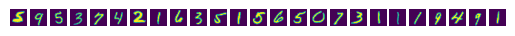

Predicted value: 
313/313 [==============================] - 1s 3ms/step
[[0.34686342 0.6808766  0.9124332  ... 0.01503926 0.00484861 0.01552189]
 [0.43717748 0.974157   0.999999   ... 0.01264307 0.0057586  0.01482134]
 [0.10225526 0.99999833 0.5336862  ... 0.01131392 0.0180658  0.03460234]
 ...
 [0.14853942 0.7245143  0.6790414  ... 0.01797198 0.01155945 0.02611704]
 [0.60826033 0.3729332  0.03497639 ... 0.02461199 0.01292629 0.02299764]
313/313 [==============================] - 1s 3ms/step
[[0.34686342 0.6808766  0.9124332  ... 0.01503926 0.00484861 0.01552189]
 [0.43717748 0.974157   0.999999   ... 0.01264307 0.0057586  0.01482134]
 [0.10225526 0.99999833 0.5336862  ... 0.01131392 0.0180658  0.03460234]
 ...
 [0.14853942 0.7245143  0.6790414  ... 0.01797198 0.01155945 0.02611704]
 [0.60826033 0.3729332  0.03497639 ... 0.02461199 0.01292629 0.02299764]
313/313 [==============================] - 1s 3ms/step
[[0.34686342 0.6808766  0.9124332  ... 0.01503926 0.00484861 0.01552189]
 [0.

In [ ]:
n = 25   # = no. of images to see predictions on

index = np.random.choice(y_test.shape[0],size=n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind])             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="  ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = model.predict(x_test_flatten)
    print(digit,end="   ")